## Normal and Shrinkage Linear Discriminant Analysis for classification

展示sklearn如何使用Linear Discriminant Analysis（LDA）线性判别分析来分类

+ 利用`sklearn.datasets.make_blobs`产生测试语料
+ 利用自定义的`generate_data` 产生具有多个特征的资料集，其中既有一个对分类有判断意义。
+ 利用`LinearDiscriminantAnalysis`来对资料分类
+ 比较 一般LDA算法和`shrinkage`前后的差异

In [14]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.lda import LDA # 这里LDA是隐式线性判别。在后面0.17版本 有改动。

n_train = 20 # 训练样例
n_test = 200 # 测试样例
n_averages = 50 # 重复分类次数
n_features_max = 75 # 最大特征个数
step = 4 # 计算步长

def generate_data(n_samples, n_features):
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]]) # centers知道聚类中心位置
    # 增加一些非判别特征
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y

In [3]:
import sklearn
sklearn.__version__
# 这里是0.16.1 使用下面的导入格式
# from sklearn.lda import LDA 

'0.16.1'

In [15]:
X, y = generate_data(10, 5)

使用 `pandas.DataFrame` 来观察数据

In [25]:
import pandas as pd
pd.set_option('precision',2 )
df = pd.DataFrame(np.hstack([y.reshape(10,1), X]), dtype='object')
df.columns = ['y', 'x0', 'x1', 'x2', 'x3', 'x4'] #设置列名
df

,y,x0,x1,x2,x3,x4
0,1,2.1,0.84,0.24,-0.37,-0.19
1,1,2,-1.5,1.3,0.92,-0.87
2,1,0.19,-1.2,-0.42,1.3,-0.53
3,0,-2.6,-1.2,1.2,-0.13,-0.84
4,1,1.8,-0.2,-0.25,-0.065,-1.1
5,0,-1.5,0.081,-0.67,-0.48,2
6,1,2.7,-0.76,-0.3,2.1,-1.2
7,0,-3.6,0.82,1.7,1.2,0.37
8,0,-1.1,0.21,0.54,-1.7,0.49
9,0,-1.9,0.92,-1.6,-0.65,-0.65


改变特征数量。测试shrinkage功能

In [28]:
acc_clf1, acc_clf2 = [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    for _ in range(n_averages):
        X, y = generate_data(n_train, n_features) #构建训练集
        
        clf1 = LDA(solver='lsqr', shrinkage='auto').fit(X, y) # 拟合训练集
        clf2 = LDA(solver='lsqr', shrinkage=None).fit(X, y)
        
        X, y = generate_data(n_test, n_features) #构建测试集
        
        score_clf1 += clf1.score(X, y) # 计算得分
        score_clf2 += clf2.score(X, y)
        
    acc_clf1.append(score_clf1/n_averages) # 计算平均得分
    acc_clf2.append(score_clf2/n_averages)
    
acc_clf1
        
        

[0.9725999999999998,
 0.96750000000000014,
 0.95880000000000021,
 0.96160000000000012,
 0.95299999999999996,
 0.95099999999999985,
 0.94579999999999997,
 0.93859999999999999,
 0.93260000000000021,
 0.93079999999999985,
 0.92699999999999994,
 0.90439999999999987,
 0.91100000000000025,
 0.92120000000000035,
 0.90460000000000007,
 0.90010000000000023,
 0.90590000000000037,
 0.88929999999999976,
 0.88840000000000008]

显示LDA判别的结果

+ 画出两条精确度的曲线
+ 比较 使用shrinkage前后的性能

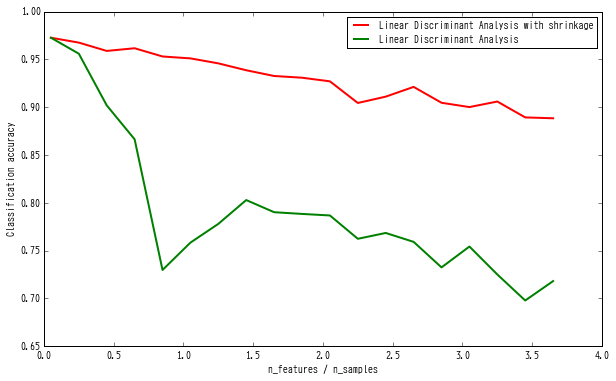

In [29]:
# plot出样本特征和精度 在不同参数下的情况
features_samples_ratio = np.array(n_features_range) / n_train
fig = plt.figure(figsize=(10,6), dpi=300)
plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
         label="Linear Discriminant Analysis with shrinkage", color='r')
plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
         label="Linear Discriminant Analysis", color='g')
plt.xlabel('n_features / n_samples')
plt.ylabel('Classification accuracy')

plt.legend(loc=1, prop={'size': 10})
plt.show()